In [86]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import seaborn as sns

#New Modules

#Scipy version 1.2.0
import scipy

#TBATS forecasting methods
import tbats
from tbats import TBATS, BATS


import matplotlib.style as style

#Auto arima/sarima package
import pmdarima as pm
from pmdarima.arima import auto_arima

#To save models as binary on disk
import pickle

#Facebook Prophet Package
from fbprophet import Prophet

print('done')



#New Source
#https://medium.com/intive-developers/forecasting-time-series-with-multiple-seasonalities-using-tbats-in-python-398a00ac0e8a

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


done


In [2]:
#Take in files for communities
com0=pd.read_csv(r'C:\Users\brhirsch\Downloads\community_0_raw.csv')

com1=pd.read_csv(r'C:\Users\brhirsch\Downloads\community_1_raw.csv')

com2=pd.read_csv(r'C:\Users\brhirsch\Downloads\community_2_raw.csv')

com3=pd.read_csv(r'C:\Users\brhirsch\Downloads\community_3_raw.csv')

community_names=[com0,com1,com2,com3]

for com in community_names:
    
    com['Trip Start Timestamp']=pd.to_datetime(com['Trip Start Timestamp'])
    
    com.set_index('Trip Start Timestamp',inplace=True)

C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


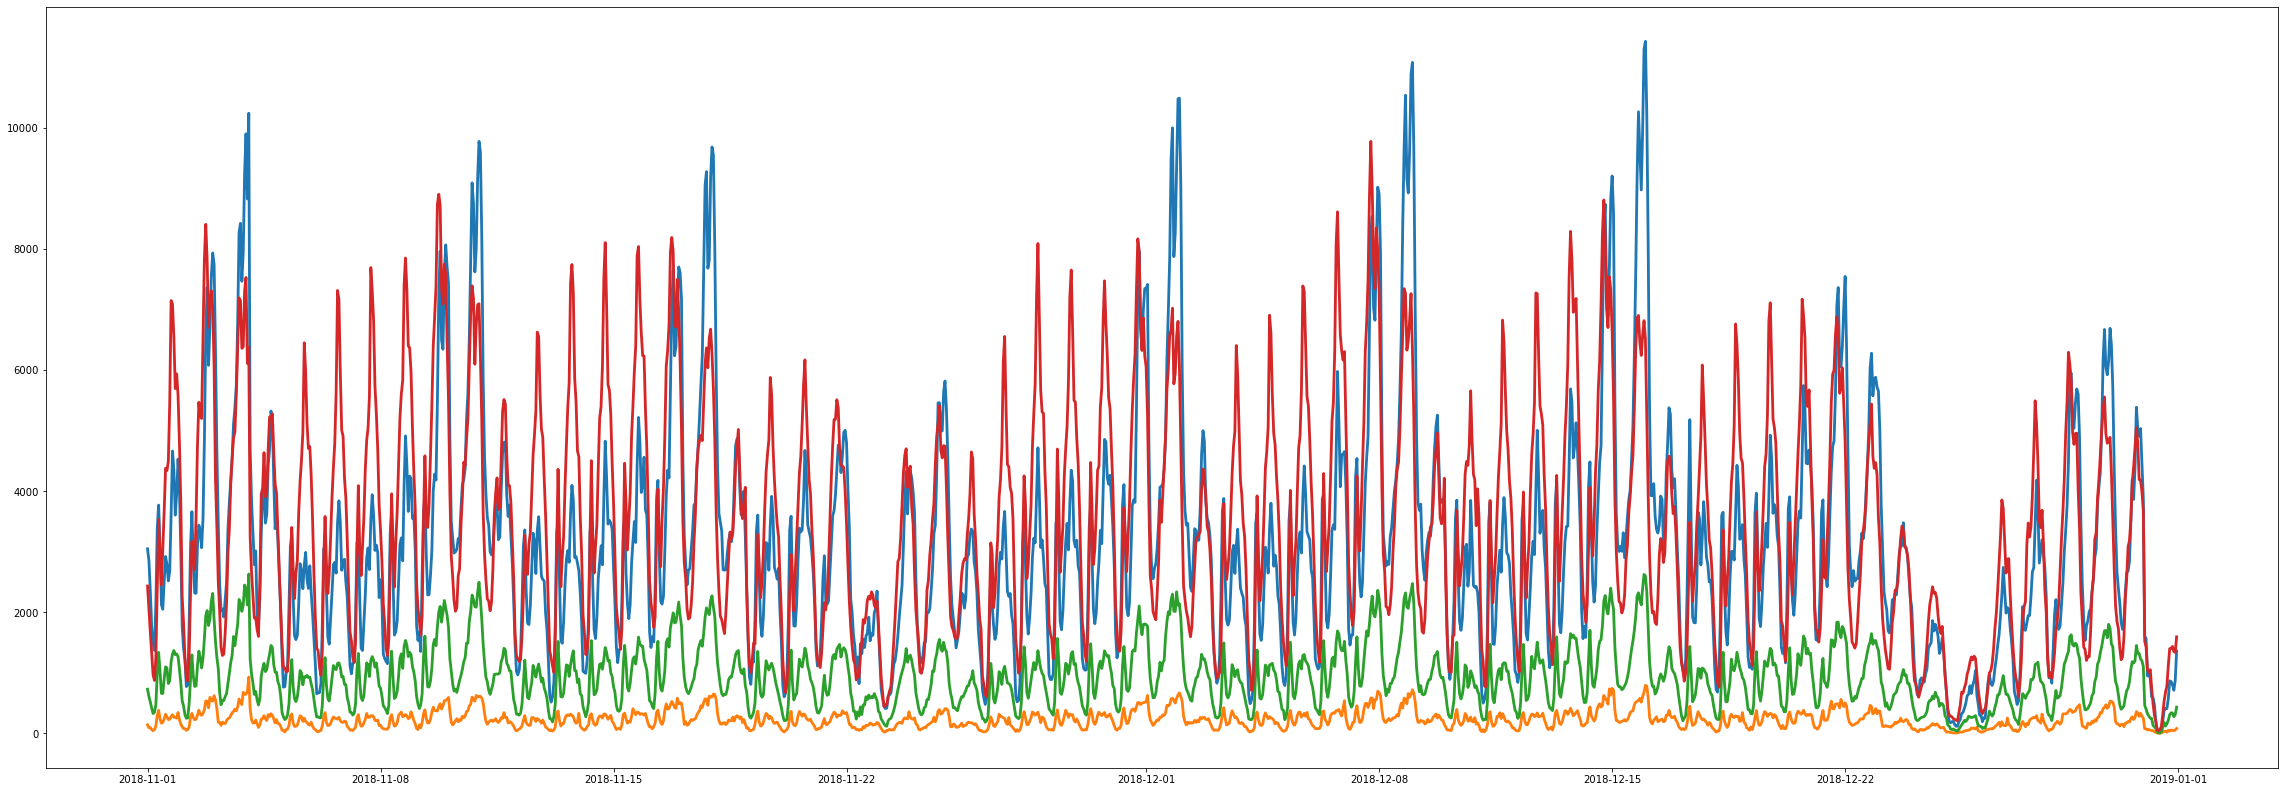

In [3]:
fig, ax=plt.subplots(figsize=(40,14))

style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

plt.plot(com0)
plt.plot(com1)
plt.plot(com2)
plt.plot(com3)




In [323]:
def test_stationarity(timeseries):
    
    print('Results of Dickey-Fuller Test:')
    timeseries=timeseries.dropna()
    dftest = adfuller(timeseries.iloc[:,0].values, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
community_list=[com0,com1,com2,com3]

for community in community_list:
    test_stationarity(community)

Results of Dickey-Fuller Test:
Test Statistic                   -5.245638
p-value                           0.000007
#Lags Used                       24.000000
Number of Observations Used    1439.000000
Critical Value (1%)              -3.434902
Critical Value (5%)              -2.863551
Critical Value (10%)             -2.567840
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -3.587011
p-value                           0.006014
#Lags Used                       24.000000
Number of Observations Used    1439.000000
Critical Value (1%)              -3.434902
Critical Value (5%)              -2.863551
Critical Value (10%)             -2.567840
dtype: float64
Results of Dickey-Fuller Test:
Test Statistic                   -4.257798
p-value                           0.000525
#Lags Used                       24.000000
Number of Observations Used    1439.000000
Critical Value (1%)              -3.434902
Critical Value (5%)              -2.863551
Critical Value (1

In [4]:
#Make testing and training sets for each community

#Community 0
com0_y = com0['trip_count']

com0_y_to_train = com0_y.iloc[:(len(com0_y)-336)]

com0_y_to_test = com0_y.iloc[(len(com0_y)-336):] # last two weeks for testing

#Community 1
com1_y = com1['trip_count']

com1_y_to_train = com1_y.iloc[:(len(com1_y)-336)]

com1_y_to_test = com1_y.iloc[(len(com1_y)-336):] # last two weeks for testing

#Community 2
com2_y = com2['trip_count']

com2_y_to_train = com2_y.iloc[:(len(com2_y)-336)]

com2_y_to_test = com2_y.iloc[(len(com2_y)-336):] # last two weeks for testing

#Community 3
com3_y = com3['trip_count']

com3_y_to_train = com3_y.iloc[:(len(com3_y)-336)]

com3_y_to_test = com3_y.iloc[(len(com3_y)-336):] # last two weeks for testing

In [6]:
#Setup TBATS Model with seasonality for 24 hours (1 day) and 168 hours (1 week)
estimator = TBATS(seasonal_periods=(24, 168))

In [7]:
#Fit and forecast community 0
com0_model = estimator.fit(com0_y_to_train)

# Forecast 336 hours ahead
com0_y_forecast = com0_model.forecast(steps=336)

C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\tbats\transformation\BoxCox.py:38: RuntimeWarning: overflow encountered in power
  return np.sign(yy) * (np.abs(yy) ** (1 / lam))


In [15]:
#Fit and forecast community 1
com1_model = estimator.fit(com1_y_to_train)

# Forecast 336 hours ahead
com1_y_forecast = com1_model.forecast(steps=336)

In [9]:
#Fit and forecast community 2
com2_model = estimator.fit(com2_y_to_train)

# Forecast 336 hours ahead
com2_y_forecast = com2_model.forecast(steps=336)

In [10]:
#Fit and forecast community 3
com3_model = estimator.fit(com3_y_to_train)

# Forecast 336 hours ahead
com3_y_forecast = com3_model.forecast(steps=336)

In [23]:
model_list=[com0_model,com1_model,com2_model,com3_model]
for model in model_list:
    print(model.summary())


Use Box-Cox: True
Use trend: True
Use damped trend: True
Seasonal periods: [ 24. 168.]
Seasonal harmonics [11  6]
ARMA errors (p, q): (0, 0)
Box-Cox Lambda 0.000000
Smoothing (Alpha): 1.542491
Trend (Beta): -0.348863
Damping Parameter (Phi): 0.800000
Seasonal Parameters (Gamma): [ 2.39140505e-06 -6.31419064e-07  2.20298422e-07 -6.93206444e-07]
AR coefficients []
MA coefficients []
Seed vector [ 8.39743052e+00 -6.04521254e-03  8.64189111e-03 -5.08025063e-02
  1.88177582e-01  6.77256691e-02 -1.20502432e-02 -9.29160264e-03
  1.04564352e-02  9.85746897e-03 -7.14318157e-03 -7.21665933e-03
 -2.26040945e-03 -4.45421455e-01 -2.00199416e-01 -6.13364168e-02
  8.76953437e-02 -4.23805584e-02 -1.24087026e-02  3.64140197e-02
  1.58782952e-02  1.03380236e-02  4.06074605e-03 -1.35118714e-02
 -2.01468387e-01  5.72238957e-02  2.51254405e-02  2.07098617e-02
  2.79549831e-02 -4.96471603e-02  2.85603727e-01 -2.35451577e-01
  4.17294536e-02 -3.71903849e-02  1.05735780e-01 -1.43073161e-01]

AIC 21373.998680


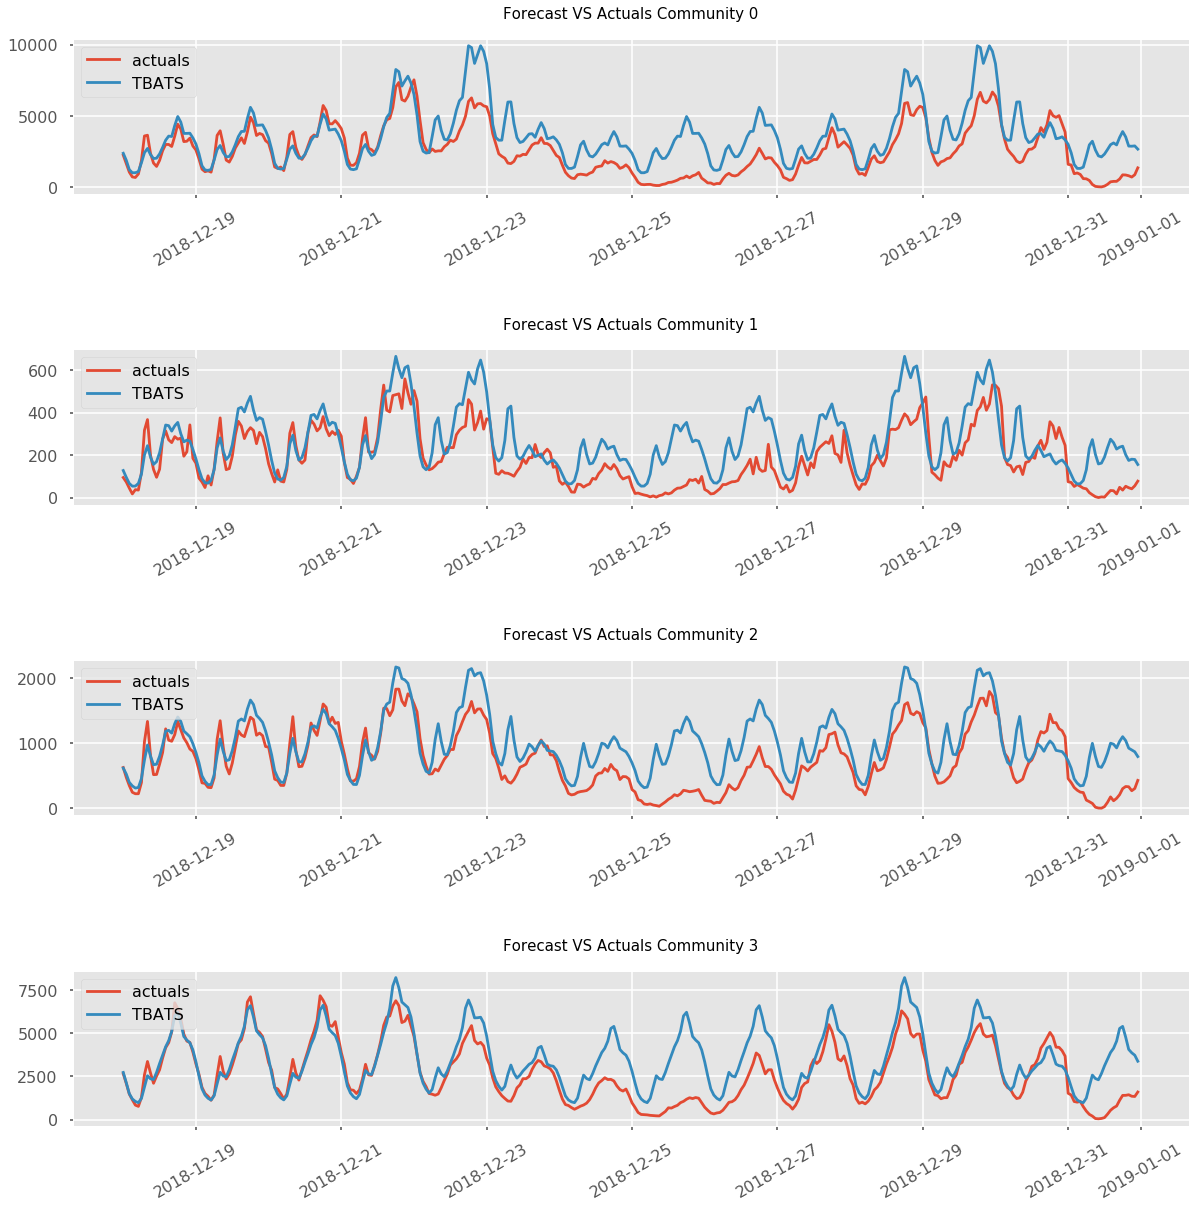

In [66]:
#Plot test and actual values for last 2 weeks of dataset 

fig, (ax1,ax2,ax3,ax4)=plt.subplots(4,1,figsize=(20,20))
fig.subplots_adjust(hspace=1)
plt.xticks(rotation=90)

#Function to plot TBATS test results
def plot_test_tbats(actual,forecast,ax,title):
    
    test_df=pd.DataFrame(data={'actual':actual,'tbats_forecast':forecast})
          
    ax.plot(test_df.actual,label='actuals')
    
    ax.plot(test_df.tbats_forecast,label='TBATS')
    
        
    ax.legend(loc='upper left')
    
    ax.set_title(title,fontsize=15,pad=20)
    
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)

            
#Plot for community 0
plot_test_tbats(com0_y_to_test,com0_y_forecast,ax1,'Forecast VS Actuals Community 0')
    
#Plot for community 1
plot_test_tbats(com1_y_to_test,com1_y_forecast,ax2,'Forecast VS Actuals Community 1')

#Plot for community 2
plot_test_tbats(com2_y_to_test,com2_y_forecast,ax3,'Forecast VS Actuals Community 2')

#Plot for community 3
plot_test_tbats(com3_y_to_test,com3_y_forecast,ax4,'Forecast VS Actuals Community 3')




In [27]:
tbats_pickup_output_2week=pd.DataFrame(data={'com0_test':com0_y_to_test,'com0_forecast':com0_y_forecast,'com1_test':com1_y_to_test,'com1_forecast':com1_y_forecast,'com2_test':com2_y_to_test,'com2_forecast':com2_y_forecast,'com3_test':com3_y_to_test,'com3_forecast':com3_y_forecast,})
tbats_pickup_output_2week.to_csv(r'C:\Users\brhirsch\Desktop\tbats_pickup_output_2week.csv')

In [48]:
#Pickle the pickup models for each community by saving them as binary on the disk

#To Read:
#with open('mypickle.pickle','rb') as f:
    #loaded_obj = pickle.load(f)

with open('com0_pickups_model.pickle', 'wb') as f:
    pickle.dump(com0_model, f)
    
with open('com1_pickups_model.pickle', 'wb') as f:
    pickle.dump(com1_model, f)

with open('com2_pickups_model.pickle', 'wb') as f:
    pickle.dump(com2_model, f)
    
with open('com3_pickups_model.pickle', 'wb') as f:
    pickle.dump(com3_model, f)


In [53]:
com0_stepwise_sarima = pm.auto_arima(com0_y_to_train, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=24,
                             start_P=0, seasonal=True,
                             trace=True,
                             error_action='ignore',  # don't want to know if an order does not work
                             suppress_warnings=True,  # don't want convergence warnings
                             stepwise=True)  # set to stepwise

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 0, 1, 24); AIC=17387.697, BIC=17412.838, Fit time=12.498 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 0, 0, 24); AIC=20358.622, BIC=20368.679, Fit time=0.052 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 0, 0, 24); AIC=17490.675, BIC=17510.788, Fit time=15.219 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 0, 1, 24); AIC=18661.517, BIC=18681.630, Fit time=6.476 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 1, 24); AIC=17307.087, BIC=17337.256, Fit time=17.896 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 0, 24); AIC=17314.470, BIC=17339.611, Fit time=14.082 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 0, 2, 24); AIC=17144.964, BIC=17180.162, Fit time=97.022 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 0, 2, 24); AIC=18646.604, BIC=18676.773, Fit time=79.976 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 0, 2, 24); AIC=17309.847, BIC=17350.073, Fit time=90.312 seconds
Fit

In [59]:

com0_stepwise_sarima_forecast=stepwise_fit.predict(n_periods=336)



In [320]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
       
    return({'mape':mape, 'rmse':rmse})

#Forecast Accuracy of SARIMA
print(forecast_accuracy(com0_stepwise_sarima_forecast,com0_y_to_test))

#Forecast Accuracy of TBATS
print(forecast_accuracy(com0_y_forecast,com0_y_to_test))



#Forecast Accuracy of TBATS
print(forecast_accuracy(df1.yhat.values,com0_y_to_test))




{'mape': 3.2009032256522985, 'rmse': 1895.6334788404279}
{'mape': 2.058118361089216, 'rmse': 1621.245901198226}
{'mape': 2.2764054279072328, 'rmse': 1756.4321480629571}


In [332]:
com0_y_prophet=com0_y.reset_index()

com0_y_prophet.columns=['ds','y']


com0_y_prophet.y, lambda_prophet = stats.boxcox(com0_y_prophet['y'])

com0_y_prophet_to_train = com0_y_prophet.iloc[:(len(com0_y_prophet)-336)]

com0_y_prophet_to_test = com0_y_prophet.iloc[(len(com0_y_prophet)-336):] 


param_list=[.01,.02,.03,.04,.05,.06]

for p in param_list:

    my_model = Prophet(changepoint_prior_scale=p,weekly_seasonality=50,interval_width=0.90)

    my_model.add_country_holidays(country_name='US')

    my_model.fit(com0_y_prophet_to_train)

    future_dates = my_model.make_future_dataframe(periods=336, freq='1h')
    
    forecast = my_model.predict(future_dates)
    
    prophet_forecast=inv_boxcox(forecast.yhat,lambda_prophet)
    
    df1=forecast[['yhat','ds']]

    df1=df1.set_index('ds')

    df1

    df1.yhat=prophet_forecast.values

    df1=df1.iloc[len(df1)-336:]
    
    print(forecast_accuracy(df1.yhat.values,com0_y_to_test))
    
    print(p)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.567976987316535, 'rmse': 2004.2986880336146}
0.01


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.4207524941299594, 'rmse': 1874.4275575001902}
0.02


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.2731081497004513, 'rmse': 1753.710814704177}
0.03


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.2445694457375858, 'rmse': 1765.0551635939348}
0.04


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.224337799229536, 'rmse': 1748.9580647294515}
0.05


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


{'mape': 2.2431314969955776, 'rmse': 1774.0307981923822}
0.06


In [335]:
com1_y_prophet=com1_y.reset_index()

com1_y_prophet.columns=['ds','y']


com1_y_prophet.y, lambda_prophet = stats.boxcox(com1_y_prophet['y'])

com1_y_prophet_to_train = com1_y_prophet.iloc[:(len(com1_y_prophet)-336)]

com1_y_prophet_to_test = com1_y_prophet.iloc[(len(com1_y_prophet)-336):] 


param_list=[.8,.85,.9,.95,.99]

for p in param_list:

    my_model = Prophet(interval_width = p,weekly_seasonality=40)

    my_model.add_country_holidays(country_name='US')

    my_model.fit(com1_y_prophet_to_train)

    future_dates = my_model.make_future_dataframe(periods=336, freq='1h')
    
    forecast = my_model.predict(future_dates)
    
    prophet_forecast=inv_boxcox(forecast.yhat,lambda_prophet)
    
    df1=forecast[['yhat','ds']]

    df1=df1.set_index('ds')

    df1

    df1.yhat=prophet_forecast.values

    df1=df1.iloc[len(df1)-336:]
    
    print(forecast_accuracy(df1.yhat.values,com1_y_to_test))
    print(p)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.9089174861221556, 'rmse': 132.24035662480662}
0.8


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.9089174861221556, 'rmse': 132.24035662480662}
0.85


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.9089174861221556, 'rmse': 132.24035662480662}
0.9


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.9089174861221556, 'rmse': 132.24035662480662}
0.95


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


{'mape': 2.9089174861221556, 'rmse': 132.24035662480662}
0.99


In [337]:
com2_y_prophet=com2_y.reset_index()

com2_y_prophet.columns=['ds','y']


com2_y_prophet.y, lambda_prophet = stats.boxcox(com2_y_prophet['y'])

com2_y_prophet_to_train = com2_y_prophet.iloc[:(len(com2_y_prophet)-336)]

com2_y_prophet_to_test = com2_y_prophet.iloc[(len(com2_y_prophet)-336):] 


param_list=[10,20,30,40,50,60,70]

for p in param_list:

    my_model = Prophet(weekly_seasonality=70,holidays_prior_scale=20)

    my_model.add_country_holidays(country_name='US')

    my_model.fit(com2_y_prophet_to_train)

    future_dates = my_model.make_future_dataframe(periods=336, freq='1h')
    
    forecast = my_model.predict(future_dates)
    
    prophet_forecast=inv_boxcox(forecast.yhat,lambda_prophet)
    
    df1=forecast[['yhat','ds']]

    df1=df1.set_index('ds')

    df1

    df1.yhat=prophet_forecast.values

    df1=df1.iloc[len(df1)-336:]
    
    print(forecast_accuracy(df1.yhat.values,com2_y_to_test))
    print(p)
    
    


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.1331640560463465, 'rmse': 466.2521484525474}
10


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.115484299284355, 'rmse': 462.99764158417656}
20


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.137765815718826, 'rmse': 469.08931863500044}
30


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.1292658337451913, 'rmse': 465.3940982347412}
40


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.1288527783392164, 'rmse': 465.1766363883766}
50


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


{'mape': 2.1477280070939773, 'rmse': 468.77114118649365}
60


C:\Users\brhirsch\AppData\Local\Continuum\anaconda3\envs\env2\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


{'mape': 2.1372740654303417, 'rmse': 466.79395678823784}
70


In [314]:
future_dates

forecast = my_model.predict(future_dates)

In [315]:
    
prophet_forecast=inv_boxcox(forecast.yhat,lambda_prophet)

len(prophet_forecast)

1464

In [316]:
df1=forecast[['yhat','ds']]

df1=df1.set_index('ds')

df1

df1.yhat=prophet_forecast.values

df1=df1.iloc[len(df1)-336:]

df1

,yhat
ds,
2018-12-18 00:00:00,2071.546384
2018-12-18 01:00:00,1558.703840
2018-12-18 02:00:00,965.672501
2018-12-18 03:00:00,603.135727
2018-12-18 04:00:00,607.306172
2018-12-18 05:00:00,1107.509306
2018-12-18 06:00:00,2256.636136
2018-12-18 07:00:00,3499.211541
2018-12-18 08:00:00,3724.164388


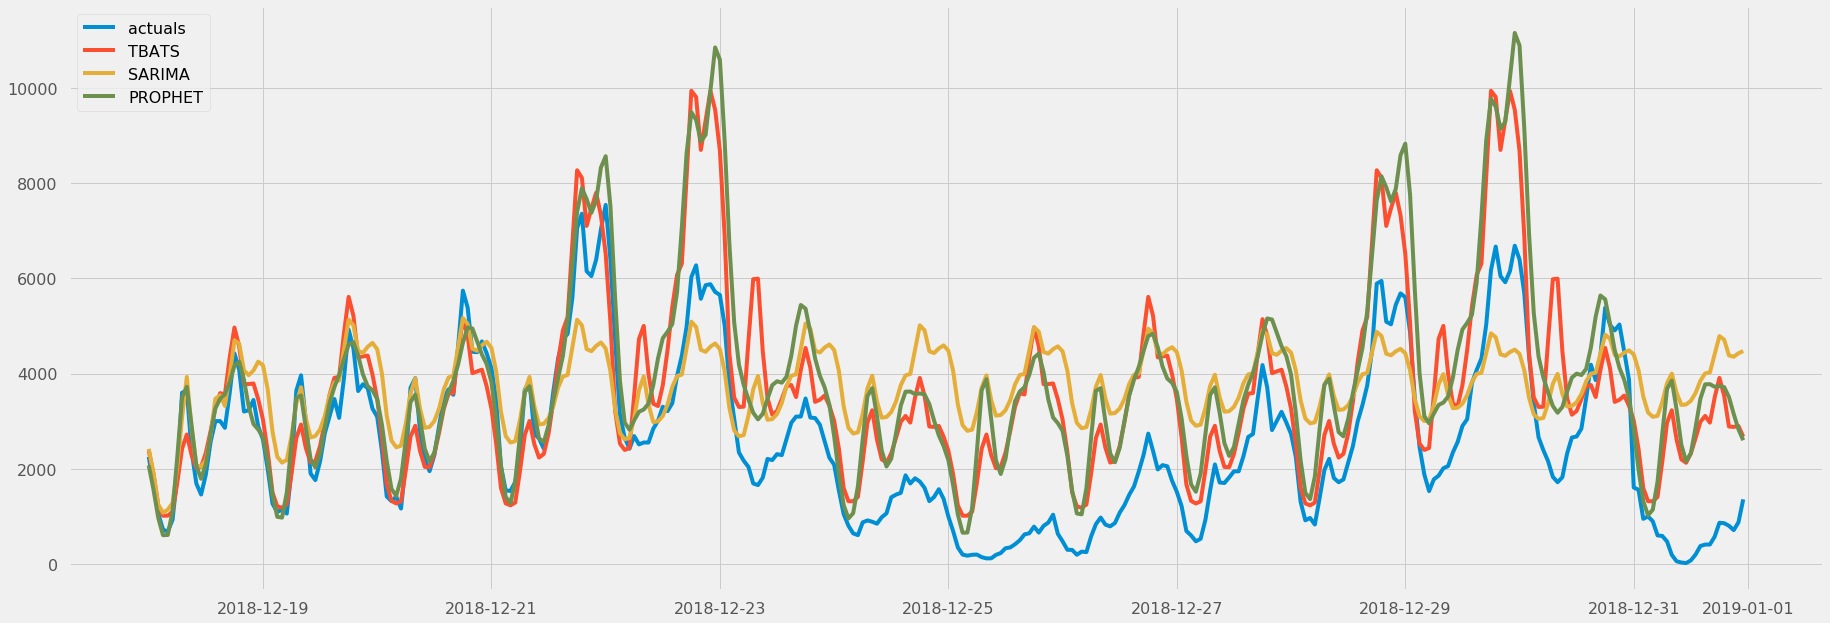

In [317]:
test_for_bryson=pd.DataFrame(data={'actual':com0_y_to_test,'tbats_forecast':com0_y_forecast,'sarima_forecast':com0_stepwise_arima_forecast,'PROPHET':df1.yhat})

fig=plt.subplots(figsize=(28,10))

plt.plot(test_for_bryson.actual,label='actuals')
    
plt.plot(test_for_bryson.tbats_forecast,label='TBATS')

plt.plot(test_for_bryson.sarima_forecast,label='SARIMA')

plt.plot(test_for_bryson.PROPHET,label='PROPHET')

plt.legend(loc='upper left')